# Chapter 4. 신경망 학습

In [1]:
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

## 4.1 데이터에서 학습한다!

### 4.1.1 데이터 주도 학습

### 4.1.2 훈련 데이터와 시험 데이터

## 4.2 손실 함수

### 4.2.1 오차제곱합

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예2 '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.5975

<br>

### 4.2.2 교차 엔트로피 오차

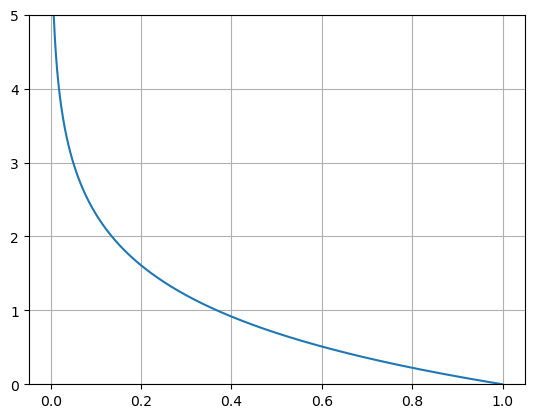

In [5]:
%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.001, 1.0, 0.001)
y = -np.log(x)
plt.plot(x, y)
plt.ylim(0.0, 5.0) # y축의 범위 지정
plt.grid()
plt.show()

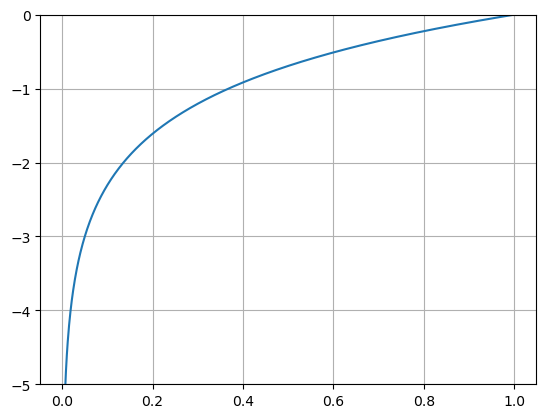

In [6]:
x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0) # y축의 범위 지정
plt.grid()
plt.show()

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

<br>

### 4.2.3 미니배치 학습

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(t_batch + 1e-7)
print(t_batch.ndim)

[[1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000001e+00
  1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07]
 [1.0000000e-07 1.0000000e-07 1.0000001e+00 1.0000000e-07 1.0000000e-07
  1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07]
 [1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000001e+00 1.0000000e-07
  1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07]
 [1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07
  1.0000001e+00 1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07]
 [1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07
  1.0000001e+00 1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07]
 [1.0000000e-07 1.0000001e+00 1.0000000e-07 1.0000000e-07 1.0000000e-07
  1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07]
 [1.0000000e-07 1.0000000e-07 1.0000001e+00 1.0000000e-07 1.0000000e-07
  1.0000000e-07 1.0000000e-07 1.0000000e-07 1.0000000e-07 

In [12]:
np.random.choice(60000, 10)

array([53116, 14857, 33706,   635, 36226, 57171, 18938, 49219, 38271,
       27955])

<br>

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [13]:
# 정답 레이블 원핫인코딩
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [14]:
# 정답 레이블 원핫인코딩X, 숫자 레이블로 구성
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

<br>

### 4.2.5 왜 손실 함수를 설정하는가?

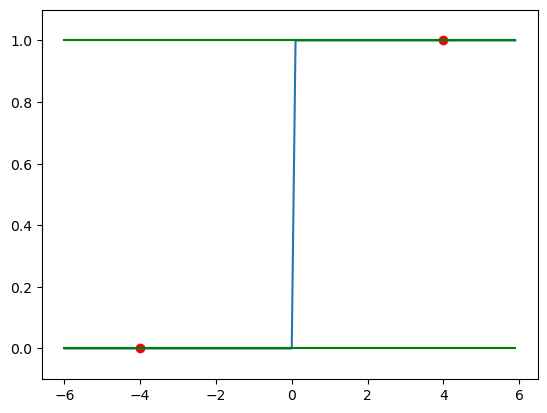

In [15]:

import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-6.0, 6.0, 0.1)
y1 = step_function(x)
y2 = np.array([1 for _ in range(x.size)])
y3 = np.array([0 for _ in range(x.size)])
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[1,0],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

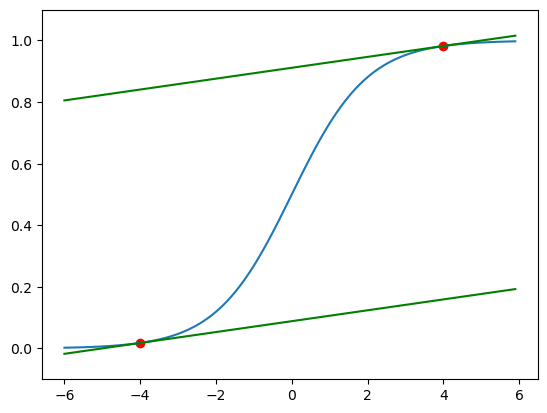

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tangent(x): # 접선 ax+b에서 a,b 값을 리턴
    return sigmoid_diff(x), sigmoid(x) - sigmoid_diff(x) * x

x = np.arange(-6.0, 6.0, 0.1)
y1 = sigmoid(x)
a2, b2 = tangent(4)
y2 = a2 * x + b2
a3, b3 = tangent(-4)
y3 = a3 * x + b3
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[a2*4+b2,a3*-4+b3],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

<br>

## 4.3 수치 미분

### 4.3.1 미분

In [17]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

In [18]:
np.float32(1e-50) # 0.0

0.0

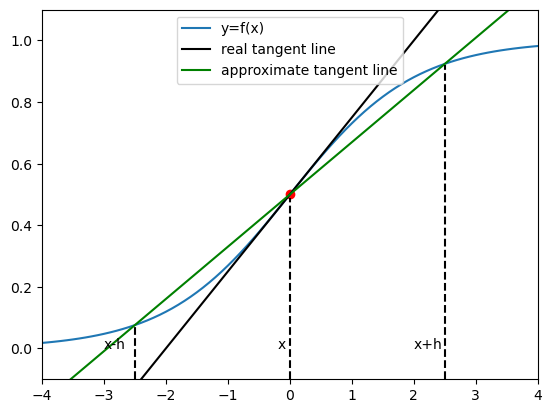

In [19]:
# 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다.
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib

x = np.arange(-6.0, 6.0, 0.1)
y1 = sigmoid(x)
a2, b2 = tangent(0)
y2 = a2 * x + b2
a3 = (sigmoid(2.5) - sigmoid(0)) / 2.5
y3 = a3 * x + b2

plt.plot(x, y1, label='y=f(x)')
plt.plot(x, y2, color='black', label='real tangent line')
plt.plot(x, y3, color='green', label='approximate tangent line')

xv = np.arange(-0.1, 0.5, 0.01)
plt.text(-0.2,0,"x")
plt.plot(np.array([0 for _ in range(xv.size)]), xv, 'k--')

xhv = np.arange(-0.1, sigmoid(2.5), 0.01)
plt.text(2,0,"x+h")
plt.plot(np.array([2.5 for _ in range(xhv.size)]), xhv, 'k--')

xhv2 = np.arange(-0.1, sigmoid(-2.5), 0.01)
plt.text(-3,0,"x-h")
plt.plot(np.array([-2.5 for _ in range(xhv2.size)]), xhv2, 'k--')

plt.scatter([0],[b2],color='red')

plt.ylim(-0.1,1.1)
plt.xlim(-4,4)
plt.legend(loc='upper center')
plt.show()

In [20]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

<br>

### 4.3.2 수치 미분의 예

In [21]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

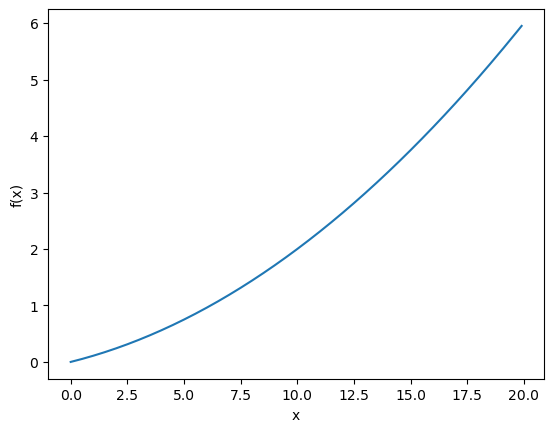

In [22]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.(20은 미포함).
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [23]:
numerical_diff(function_1, 5)

0.1999999999990898

In [24]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


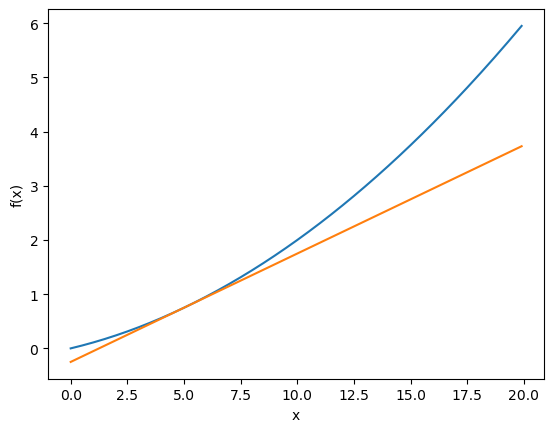

In [25]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

<br>

### 4.3.3 편미분

In [26]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

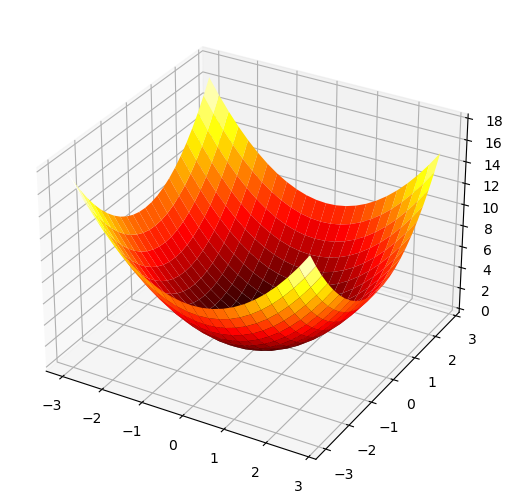

In [27]:
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
XX, YY = np.meshgrid(X, Y)
ZZ = XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');

In [28]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [29]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

<br>

## 4.4 기울기

In [30]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


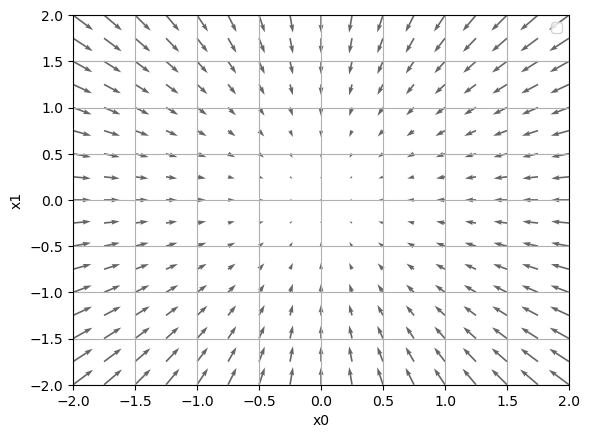

In [31]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


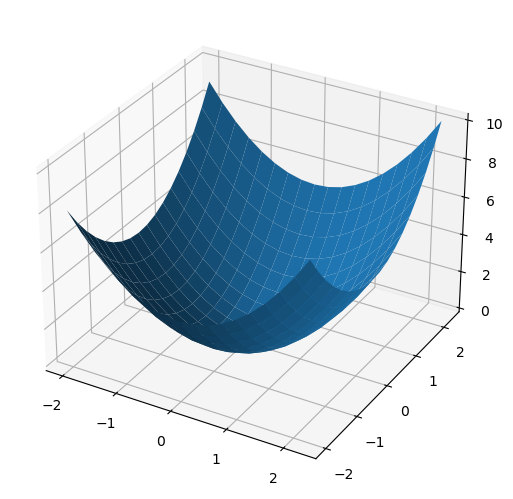

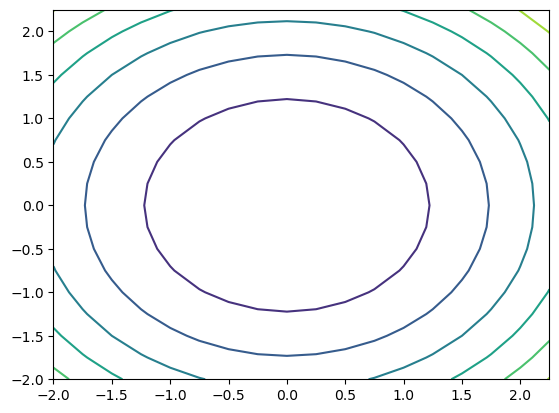

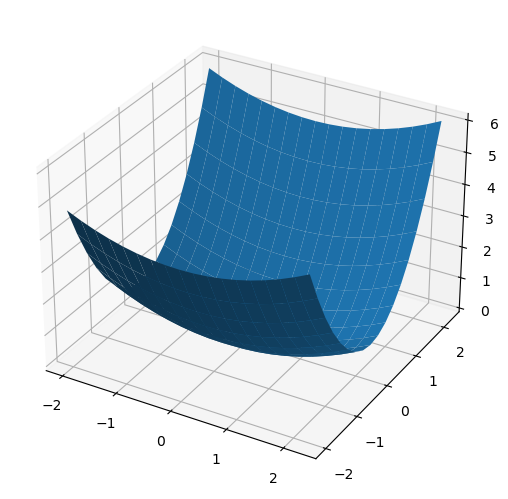

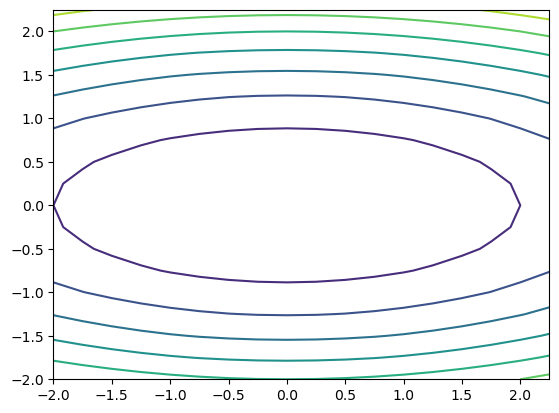

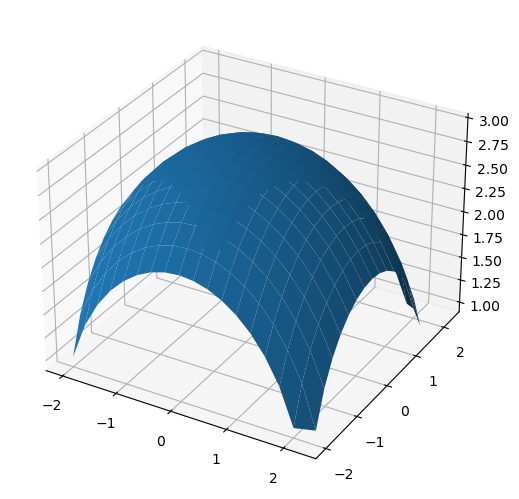

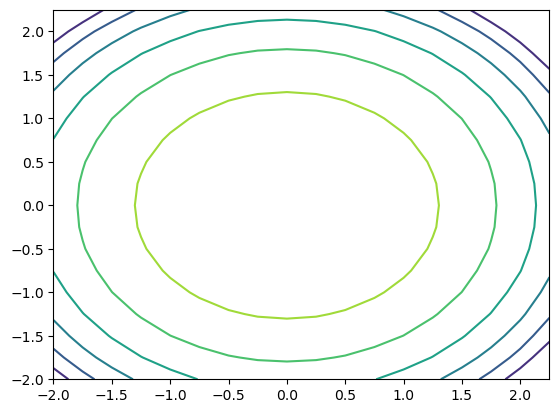

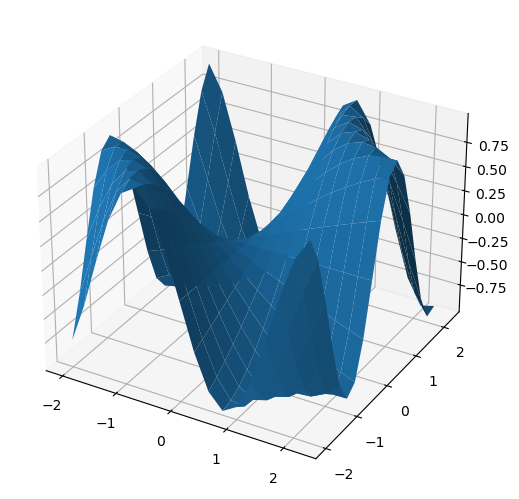

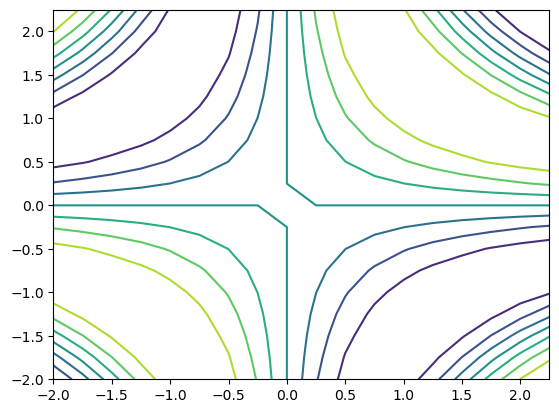

In [32]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


x = np.arange(-2, 2.5, 0.25)
y = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x, y)
Z=X**2+Y**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

Z=(1/5)*X**2+Y**2
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

Z=np.sqrt(9-X**2-Y**2)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

Z=np.sin(X*Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()
plt.contour(X,Y,Z)
plt.show()

<br>

### 4.4.1 경사법(경사 하강법)

In [33]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [34]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

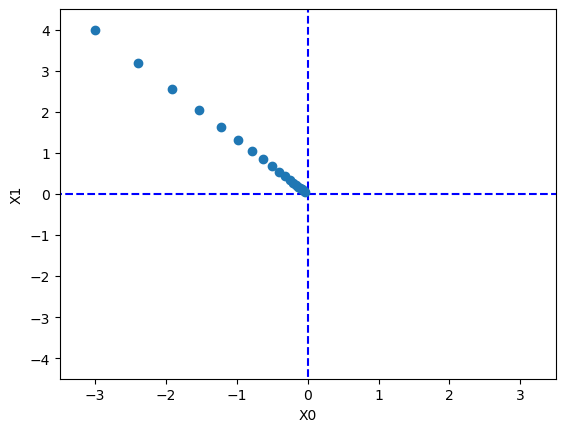

In [35]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [36]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [37]:
# 학습률이 너무 큰 예 : lr=10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [38]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

<br>

### 4.4.2 신경망에서의 기울기

In [39]:
import numpy as np

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h) # net.loss(x, t)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [40]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-1.72775903 -1.13145382 -1.3312537 ]
 [-0.35055331  2.69190287 -0.02449248]]


In [41]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.35215339  1.74384029 -0.82079545]


In [42]:
np.argmax(p) # 최대값의 인덱스

1

In [43]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

2.679906512061387

In [44]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.02418337  0.53467489 -0.55885826]
 [ 0.03627505  0.80201234 -0.83828739]]


In [45]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.4748038   0.03906614 -0.51386995]
 [ 0.7122057   0.05859922 -0.77080492]]


<br>

## 4.5 학습 알고리즘 구현하기

### 4.5.1 2층 신경망 클래스 구현하기

In [46]:
import numpy as np

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [47]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [48]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [49]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

In [50]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)  # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


<br>

### 4.5.2 미니배치 학습 구현하기

In [51]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

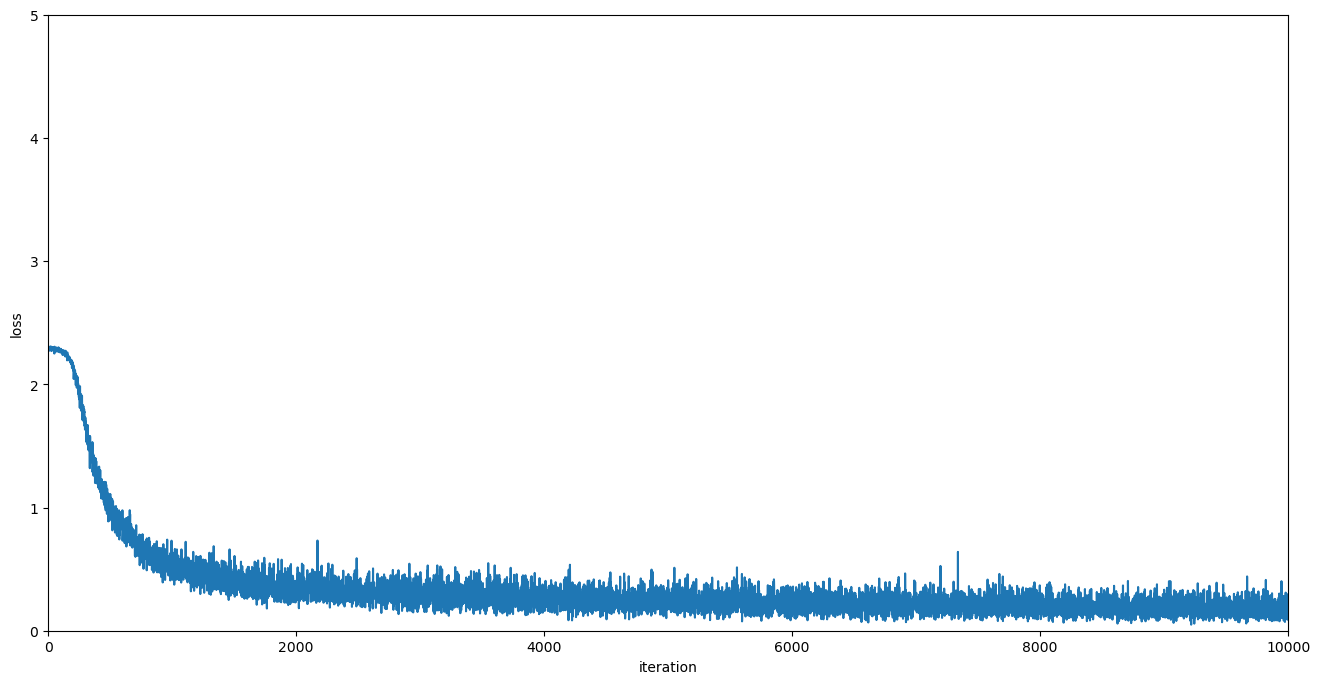

In [52]:
x = np.array(range(iters_num))
plt.figure(figsize=(16,8))
plt.plot(x, train_loss_list, label='loss')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.show()

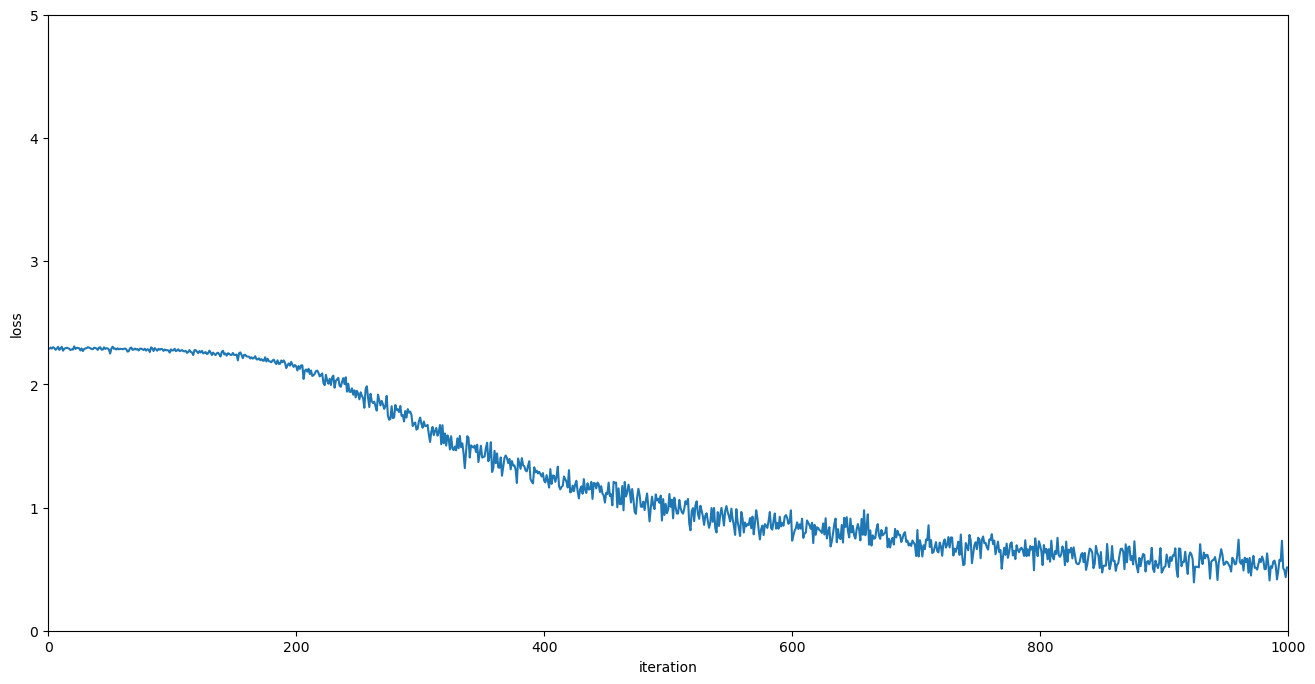

In [53]:
x = np.array(range(iters_num))
plt.figure(figsize=(16,8))
plt.plot(x[:1000], train_loss_list[:1000], label='loss')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.xlim(0, 1000)
plt.ylim(0, 5.0)
plt.show()

<br>

### 4.5.3 시험 데이터로 평가하기

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7796833333333333, 0.7839
train acc, test acc | 0.8733, 0.8759
train acc, test acc | 0.89775, 0.9013
train acc, test acc | 0.9062833333333333, 0.9082
train acc, test acc | 0.9142, 0.916
train acc, test acc | 0.9189666666666667, 0.9207
train acc, test acc | 0.9233666666666667, 0.9243
train acc, test acc | 0.9269333333333334, 0.9291
train acc, test acc | 0.93075, 0.9306
train acc, test acc | 0.9334, 0.9324
train acc, test acc | 0.9364166666666667, 0.9357
train acc, test acc | 0.9394, 0.9389
train acc, test acc | 0.9414166666666667, 0.9404
train acc, test acc | 0.9430333333333333, 0.9403
train acc, test acc | 0.9451833333333334, 0.9421
train acc, test acc | 0.9478333333333333, 0.9445


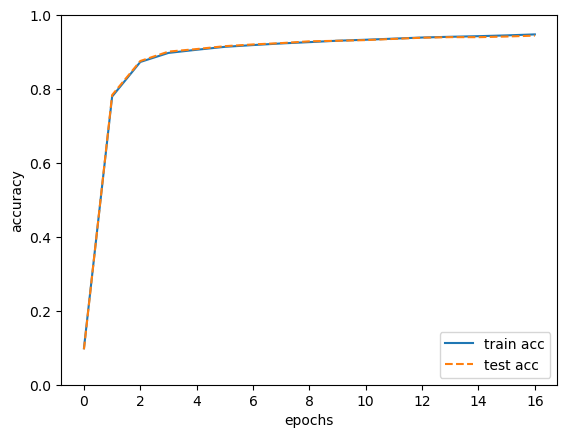

In [54]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # chain rule
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


<br>

## 4.6 정리

### 이번 장에서 배운 내용

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로 손실함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있다.